## Problem Set 1
Your client is the Central Bank of Malaysia. They would like to know how the Malaysian Ringgit has been faring against major trading partners in 2022, 2023, and 2024.
There is a data set here that you can utilise:
https://data.gov.my/data-catalogue/exchangerates
Whether you pick CSV or Parquet, or the API, it is entirely up to you, but you must output a visualisation of the percent change from 2022, to 2023, to current 2024. These can be output as 3 separate charts, and you can also show the data in a trend over time (so output of 4 charts).
Do not use a BI tool, but showcase your expertise in one of the languages suggested in the requirements: Python, Go, or JavaScript/TypeScript.
Check it into your git repository as you go, then share the github link when complete.
This task should take no more than 2 hours of your time and should be accomplished in a little over 100 lines of code!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('exchangerates.parquet')

In [3]:
df.head()

,date,myr_usd,myr_rmb,myr_sgd,myr_eur,myr_jpy,myr_twd,myr_thb,myr_idr,myr_hkd,...,myr_aed,myr_sar,myr_try,myr_gbp,myr_brl,myr_mxn,myr_bdt,myr_chf,myr_cad,myr_rub
0,2003-12-01,0.263380,2.177413,0.453461,0.220125,28.753161,8.359132,10.506216,2238.306086,2.045143,...,0.966999,0.987621,0.353535,0.153253,0.769859,2.991467,14.910451,0.341893,0.343500,7.822377
1,2003-12-02,0.263359,2.177241,0.452977,0.217850,28.635010,8.359132,10.494587,2234.889529,2.043507,...,0.966922,0.987543,0.353535,0.152203,0.771905,2.973322,14.934028,0.338996,0.341471,7.819125
2,2003-12-03,0.263838,2.181178,0.452773,0.217635,28.573691,8.359132,10.502612,2234.156621,2.047491,...,0.968682,0.989341,0.353535,0.152675,0.773310,2.966862,14.980212,0.339085,0.343016,7.833360
3,2003-12-04,0.263248,2.176271,0.451075,0.217903,28.501853,8.359132,10.495695,2235.633105,2.044463,...,0.966515,0.987127,0.353535,0.152989,0.774739,2.945218,14.935109,0.339195,0.345223,7.813199
4,2003-12-05,0.263880,2.181470,0.452290,0.216527,28.398777,8.359132,10.505859,2234.826884,2.047630,...,0.968915,0.989498,0.353535,0.152259,0.774224,2.954665,14.977571,0.335761,0.343809,7.816129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7390 entries, 0 to 7389
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7390 non-null   datetime64[us]
 1   myr_usd  7390 non-null   float64       
 2   myr_rmb  7390 non-null   float64       
 3   myr_sgd  7390 non-null   float64       
 4   myr_eur  7390 non-null   float64       
 5   myr_jpy  7390 non-null   float64       
 6   myr_twd  7390 non-null   float64       
 7   myr_thb  7390 non-null   float64       
 8   myr_idr  7390 non-null   float64       
 9   myr_hkd  7390 non-null   float64       
 10  myr_krw  7390 non-null   float64       
 11  myr_vnd  7390 non-null   float64       
 12  myr_inr  7390 non-null   float64       
 13  myr_aud  7390 non-null   float64       
 14  myr_php  7390 non-null   float64       
 15  myr_aed  7390 non-null   float64       
 16  myr_sar  7390 non-null   float64       
 17  myr_try  7390 non-null   float64 

In [5]:
print("Duplicate",df.duplicated().sum())

empty_values = df[df == ' '].count()
print("Empty values:",empty_values.sum())

nan_values = df.isnull().sum()
print("NaN values:",nan_values.sum())

#df.drop_duplicates(inplace=True)

Duplicate 0
Empty values: 0
NaN values: 0


In [6]:
def get_df_year_filter(df,year1,year2):
    selected_dates = [f'{year1}-01-01', f'{year2}-01-01']
    year_string=str(year1)+"-"+str(year2)
    df = df[df['date'].isin(selected_dates)]
    num_rows = df.shape[0]
    num_col=df.shape[1]
    i = 0+1
    #while i<num_rows-1:
    for i in range(1,num_rows):
        print(i)
        for j in range(1,num_col):
            #df.iloc[i,j] = (df.iloc[i+1,j] - df.iloc[i,j]) / abs (df.iloc[i,j])*100

            df.iloc[i,j] = (df.iloc[i,j] - df.iloc[i-1,j]) / abs (df.iloc[i-1,j])*100
        i+=1

    df.set_index('date', inplace=True)
    df_percentage_change = df.T.reset_index()
    df_percentage_change.reset_index(inplace=True)
    df_percentage_change.rename(columns={'index': 'date'}, inplace=True)
    columns = df_percentage_change.columns.tolist()
    #columns[2] = '2022-2023'
    columns[3] = year_string
    columns[1]= "pairs"
    df_percentage_change.columns = columns


    return df_percentage_change
    

def plot_pairs(df_percentage_change,year_string):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='pairs', y=year_string, data=df_percentage_change, hue='pairs')
    plt.title(f'Percentage Change of Currency Pairs with Respect to MYR in {year_string}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2021-22

1


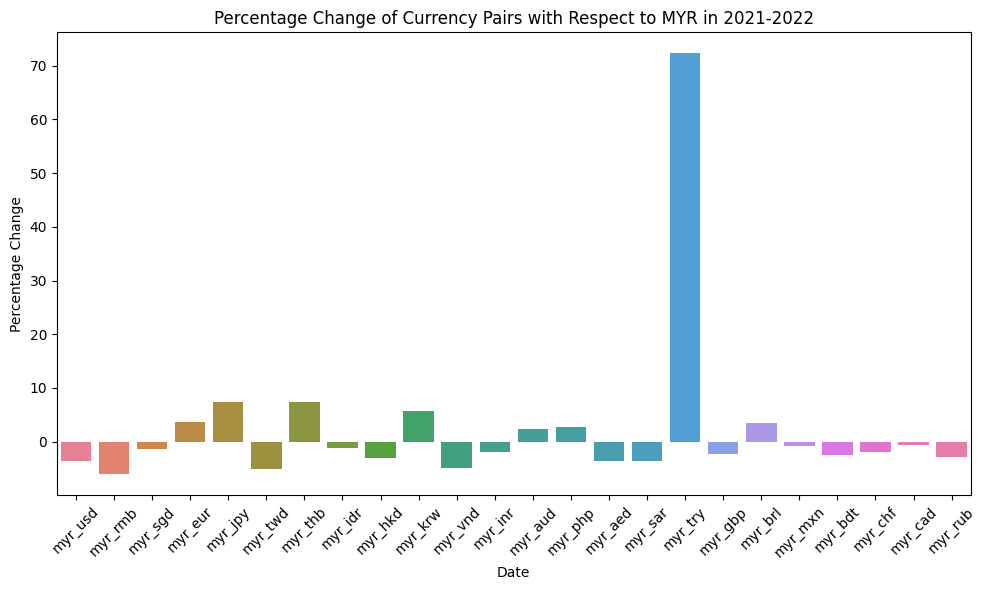

In [7]:
year1=2021
year2=2022

df_percentage_change=get_df_year_filter(df,year1,year2)

year_string=str(year1)+"-"+str(year2)

plot_pairs(df_percentage_change,year_string)




# 2022-2023

1


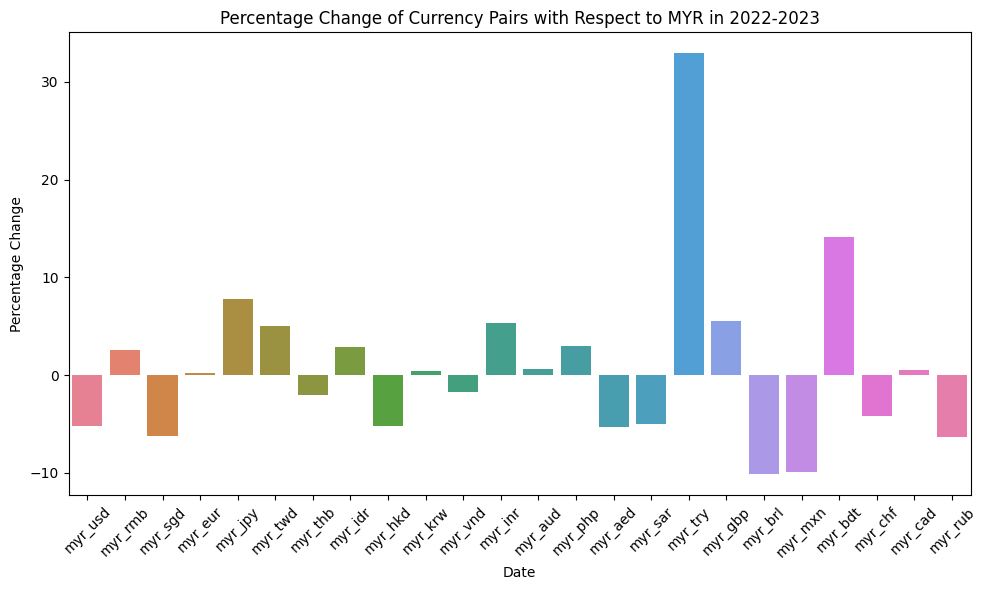

In [8]:
year1=2022
year2=2023

df_percentage_change=get_df_year_filter(df,year1,year2)

year_string=str(year1)+"-"+str(year2)

plot_pairs(df_percentage_change,year_string)




# 2023-2024

1


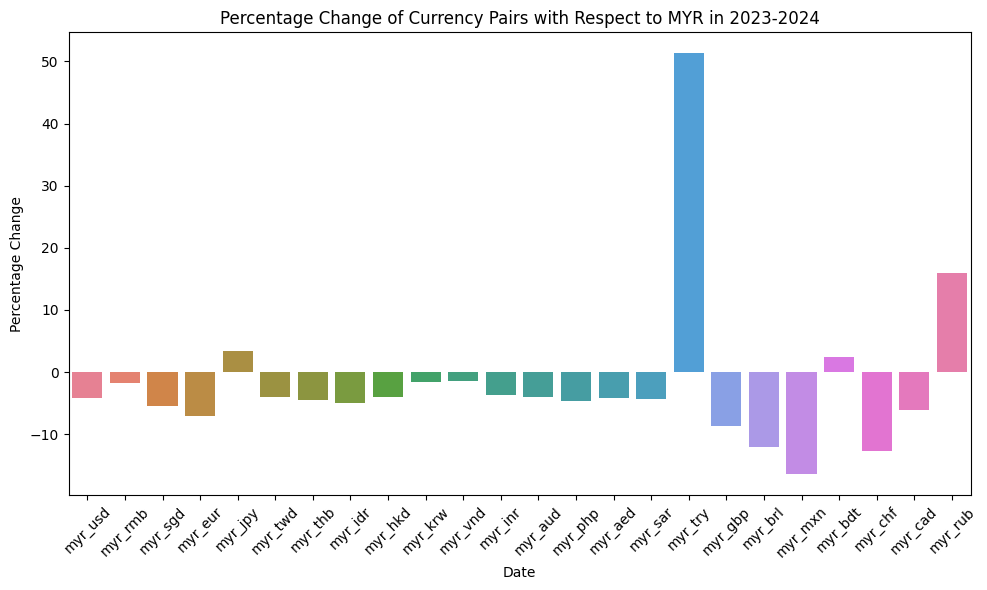

In [9]:
year1=2023
year2=2024

df_percentage_change=get_df_year_filter(df,year1,year2)

year_string=str(year1)+"-"+str(year2)

plot_pairs(df_percentage_change,year_string)




In [ ]:
df

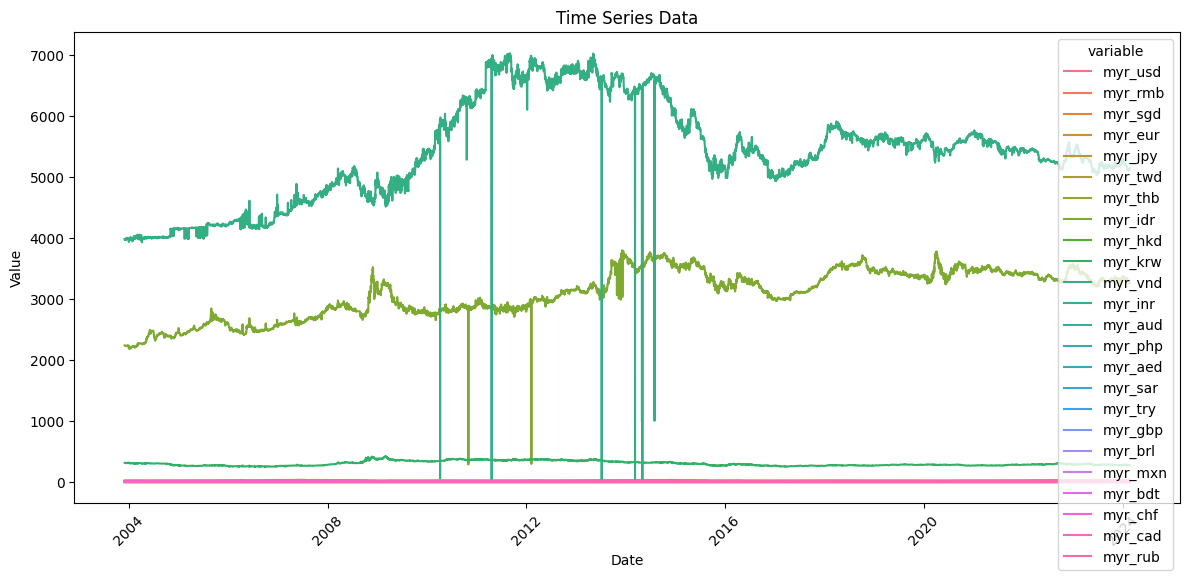

In [10]:
# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df, id_vars='date', var_name='variable', value_name='value')

# Set the figure size
plt.figure(figsize=(12, 6))

# Use seaborn to plot the time series data
sns.lineplot(data=df_melted, x='date', y='value', hue='variable')

# Set title and labels
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# rough work Ignore

In [ ]:
year1=2021
year2=2022

selected_dates = [f'{year1}-01-01', f'{year2}-01-01']
year_string=str(year1)+"-"+str(year2)
df = df[df['date'].isin(selected_dates)]
num_rows = df.shape[0]
num_col=df.shape[1]
i = 0+1
#while i<num_rows-1:
for i in range(1,num_rows):
    print(i)
    for j in range(1,num_col):
        #df.iloc[i,j] = (df.iloc[i+1,j] - df.iloc[i,j]) / abs (df.iloc[i,j])*100

        df.iloc[i,j] = (df.iloc[i,j] - df.iloc[i-1,j]) / abs (df.iloc[i-1,j])*100
    i+=1

df.set_index('date', inplace=True)
df_percentage_change = df.T.reset_index()
df_percentage_change.reset_index(inplace=True)
df_percentage_change.rename(columns={'index': 'date'}, inplace=True)
columns = df_percentage_change.columns.tolist()
#columns[2] = '2022-2023'
columns[3] = year_string
columns[1]= "pairs"

df_percentage_change.columns = columns



In [ ]:
#df.set_index('date', inplace=True)

In [ ]:
df.iloc[0,1]
print((0.2271436602- 0.2397219092)/abs(0.2397219092)*100)


In [ ]:
selected_dates = ['2022-01-01', '2023-01-01', '2024-01-01']
df = df[df['date'].isin(selected_dates)]
num_rows = df.shape[0]
num_col=df.shape[1]
i = 0+1
#while i<num_rows-1:
for i in range(1,num_rows):
    print(i)
    for j in range(1,num_col):
        #df.iloc[i,j] = (df.iloc[i+1,j] - df.iloc[i,j]) / abs (df.iloc[i,j])*100

        df.iloc[i,j] = (df.iloc[i,j] - df.iloc[i-1,j]) / abs (df.iloc[i-1,j])*100
    i+=1





    

In [ ]:
df = df[df['date'].dt.year != 2022]

In [ ]:
# Reshape the DataFrame
df.set_index('date', inplace=True)
df_percentage_change = df.T.reset_index()


In [ ]:
df_percentage_change.reset_index(inplace=True)
df_percentage_change.rename(columns={'index': 'date'}, inplace=True)
columns = df_percentage_change.columns.tolist()
columns[2] = '2022-2023'
columns[3] = '2023-2024'
df_percentage_change.columns = columns

In [ ]:
df_percentage_change.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='2022-2023', data=df_percentage_change, marker='o')
plt.title('Percentage Change of Currency Pairs with Respect to MYR in 2022-2023')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='2022-2023', data=df_percentage_change, marker='o')
plt.title('Percentage Change of Currency Pairs with Respect to MYR in 2022-2023')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.barplot

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='2022-2023', data=df_percentage_change,hue='date')
plt.title('Percentage Change of Currency Pairs with Respect to MYR in 2022-2023')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Set 'date' as index
df.set_index('date', inplace=True)

# Calculate percentage change for each currency pair with respect to USD
df_percentage_change = df.divide(df['myr_usd'], axis=0) * 100

# Drop 'myr_usd' column
df_percentage_change.drop(columns=['myr_usd'], inplace=True)

# Reshape the DataFrame
df_percentage_change = df_percentage_change.T.reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='value', hue='index', data=df_percentage_change, marker='o')
plt.title('Percentage Change of Currency Pairs with Respect to USD')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()